In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
df = pd.read_excel(r"/content/Orders Detail.xlsx")
df

,order_details_id,order_id,pizza_id,pizza_type_id,category,size,price,quantity,amount,date,time
0,1,1,hawaiian_m,hawaiian,Classic,M,13.25,1,13.25,2015-01-01,11:38:36
1,2,2,classic_dlx_m,classic_dlx,Classic,M,16.00,1,16.00,2015-01-01,11:38:36
2,3,2,five_cheese_l,five_cheese,Veggie,L,18.50,1,18.50,2015-01-01,11:57:40
3,4,2,ital_supr_l,ital_supr,Supreme,L,20.75,1,20.75,2015-01-01,11:57:40
4,5,2,mexicana_m,mexicana,Veggie,M,16.00,1,16.00,2015-01-01,11:57:40
...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,ckn_alfredo,Chicken,M,16.75,1,16.75,2015-12-31,21:14:37
48616,48617,21348,four_cheese_l,four_cheese,Veggie,L,17.95,1,17.95,2015-12-31,21:23:10
48617,48618,21348,napolitana_s,napolitana,Classic,S,12.00,1,12.00,2015-12-31,21:23:10
48618,48619,21349,mexicana_l,mexicana,Veggie,L,20.25,1,20.25,2015-12-31,21:23:10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_details_id  48620 non-null  int64         
 1   order_id          48620 non-null  int64         
 2   pizza_id          48620 non-null  object        
 3   pizza_type_id     48620 non-null  object        
 4   category          48620 non-null  object        
 5   size              48620 non-null  object        
 6   price             48620 non-null  float64       
 7   quantity          48620 non-null  int64         
 8   amount            48620 non-null  float64       
 9   date              48620 non-null  datetime64[ns]
 10  time              48620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 4.1+ MB


In [ ]:
# sample = df.sample(
#           n=None,
#           frac=0.10,
#           replace=False,
#           weights=None,
#           random_state=None,
#           axis=None,
#           ignore_index=False)

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoders
label_encoder_pizza_id = LabelEncoder()
label_encoder_category = LabelEncoder()

# Fit and transform the 'pizza_type' column
df['pizza_id_numeric'] = label_encoder_pizza_id.fit_transform(df['pizza_id'])

# Fit and transform the 'pizza_size' column
df['pizza_category_numeric'] = label_encoder_category.fit_transform(df['category'])

# Get the mapping of the original values to their numeric equivalents
pizza_mapping = dict(zip(label_encoder_pizza_id.classes_, label_encoder_pizza_id.transform(label_encoder_pizza_id.classes_)))
cat_mapping = dict(zip(label_encoder_category.classes_, label_encoder_category.transform(label_encoder_category.classes_)))

In [ ]:
# Inverse mapping for pizza id
inverse_pizza_mapping = {v: k for k, v in pizza_mapping.items()}

# Map the numeric values back to original names
df['pizza_id_new'] = df['pizza_id_numeric'].map(inverse_pizza_mapping)

In [ ]:
import sys
print(sys.executable)

/usr/bin/python3


In [ ]:
data = df[['pizza_id_numeric','pizza_category_numeric','price','quantity']]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

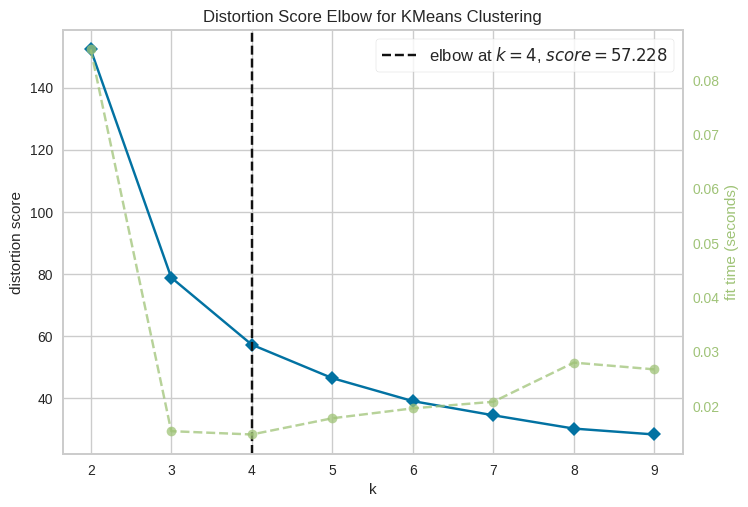

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn import datasets
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Load a sample dataset
data = datasets.load_iris().data

# Instantiate the clustering model and visualizer
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))

# Fit the data to the visualizer and render the figure
visualizer.fit(data)
visualizer.show()


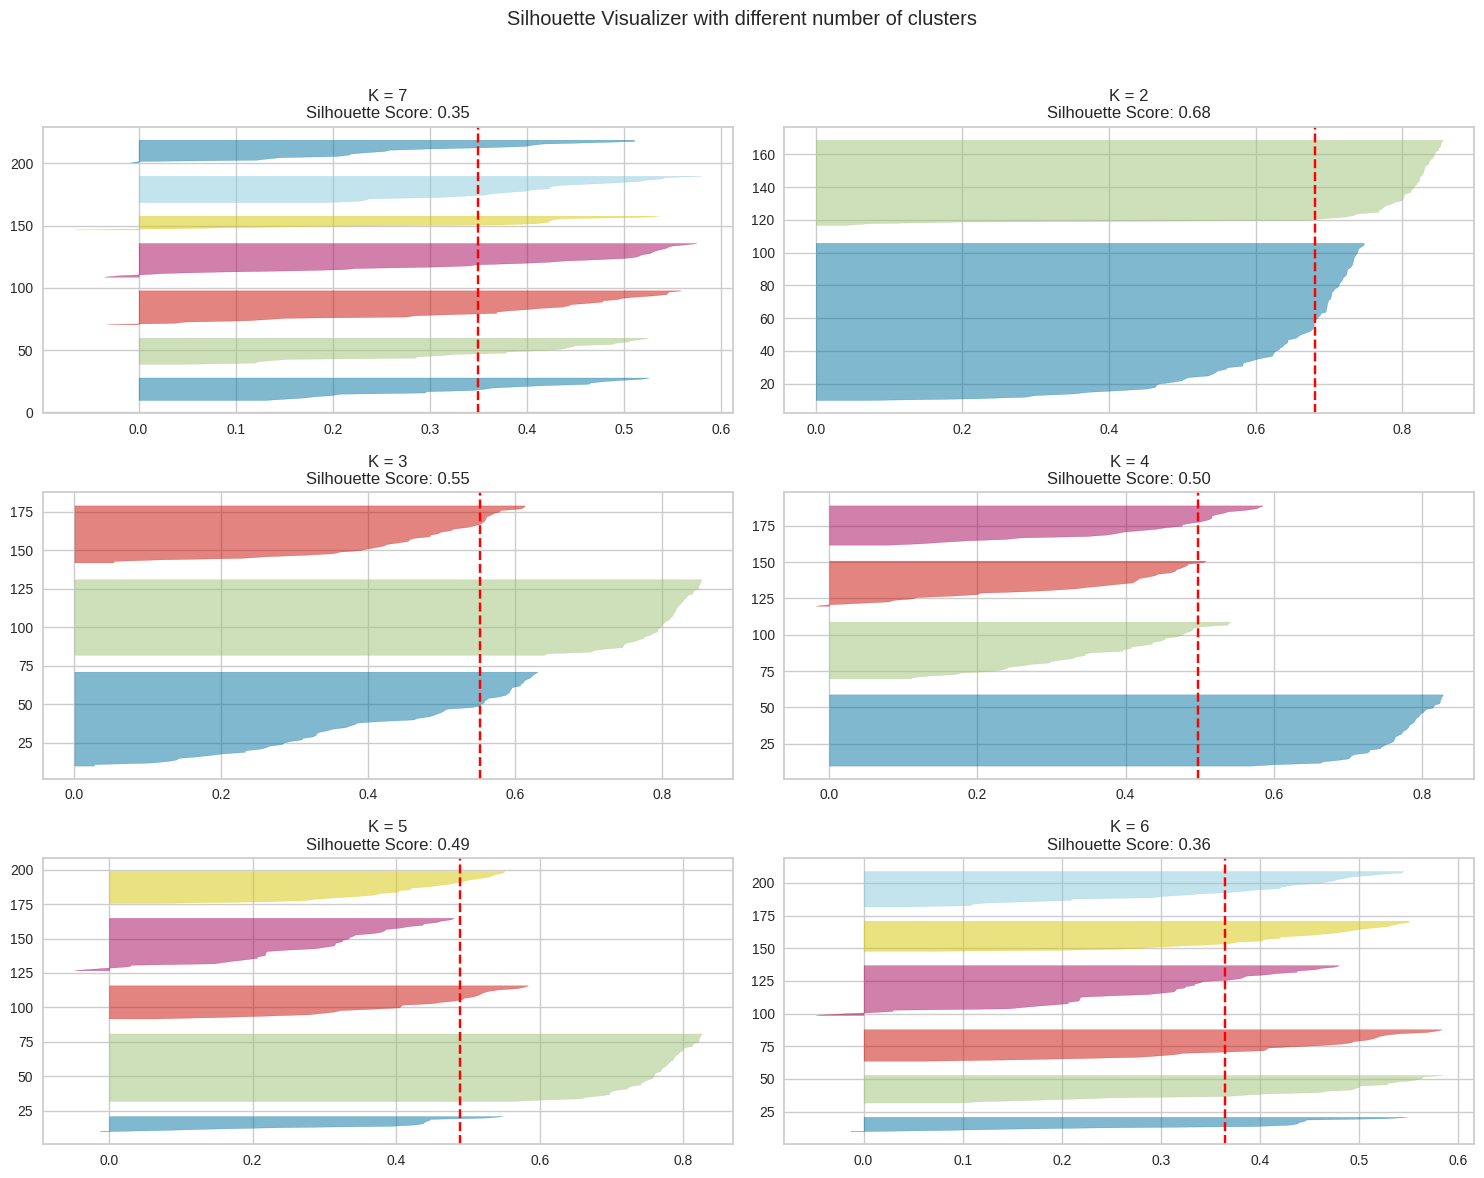

In [ ]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer

# Load the dataset
data, _ = datasets.load_iris(return_X_y=True)

fig, ax = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle('Silhouette Visualizer with different number of clusters')

silhouette_scores = []
for i in [2, 3, 4, 5, 6, 7]:
    # Create KMeans instance for different number of clusters
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i-1, 2)  # Adjusted indexing for proper subplot placement

    # Fit the model and create SilhouetteVisualizer instance with KMeans instance
    # Correct the index calculation to stay within bounds
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q % 3][mod])
    visualizer.fit(data)

    # Calculate and store the silhouette score
    labels = km.labels_
    score = silhouette_score(data, labels)
    silhouette_scores.append(score)
    ax[q % 3][mod].set_title(f'K = {i}\nSilhouette Score: {score:.2f}')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

K-Means

In [ ]:
# KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=0)

# Select the columns from 'df' that correspond to the features in 'data'
# Replace 'pizza_id_numeric', 'pizza_category_numeric', 'price', 'quantity' with the actual column names
df_for_clustering = df[['pizza_id_numeric', 'pizza_category_numeric', 'price', 'quantity']]

# Fit and predict on the data derived from 'df'
cluster_assignments = kmeans.fit_predict(df_for_clustering)

# Add the clusters to your DataFrame 'df'
df['Cluster'] = cluster_assignments

print(df.head()) # Check the results

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   order_details_id  order_id       pizza_id pizza_type_id category size  \
0                 1         1     hawaiian_m      hawaiian  Classic    M   
1                 2         2  classic_dlx_m   classic_dlx  Classic    M   
2                 3         2  five_cheese_l   five_cheese   Veggie    L   
3                 4         2    ital_supr_l     ital_supr  Supreme    L   
4                 5         2     mexicana_m      mexicana   Veggie    M   

   price  quantity  amount       date      time  pizza_id_numeric  \
0  13.25         1   13.25 2015-01-01  11:38:36                27   
1  16.00         1   16.00 2015-01-01  11:38:36                18   
2  18.50         1   18.50 2015-01-01  11:57:40                20   
3  20.75         1   20.75 2015-01-01  11:57:40                32   
4  16.00         1   16.00 2015-01-01  11:57:40                42   

   pizza_category_numeric   pizza_id_new  Cluster  
0                       1     hawaiian_m        3  
1                       

In [ ]:
df

,order_details_id,order_id,pizza_id,pizza_type_id,category,size,price,quantity,amount,date,time,pizza_id_numeric,pizza_category_numeric,Cluster
0,1,1,hawaiian_m,hawaiian,Classic,M,13.25,1,13.25,2015-01-01,11:38:36,27,1,0
1,2,2,classic_dlx_m,classic_dlx,Classic,M,16.00,1,16.00,2015-01-01,11:38:36,18,1,0
2,3,2,five_cheese_l,five_cheese,Veggie,L,18.50,1,18.50,2015-01-01,11:57:40,20,3,0
3,4,2,ital_supr_l,ital_supr,Supreme,L,20.75,1,20.75,2015-01-01,11:57:40,32,2,0
4,5,2,mexicana_m,mexicana,Veggie,M,16.00,1,16.00,2015-01-01,11:57:40,42,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,ckn_alfredo,Chicken,M,16.75,1,16.75,2015-12-31,21:14:37,12,0,2
48616,48617,21348,four_cheese_l,four_cheese,Veggie,L,17.95,1,17.95,2015-12-31,21:23:10,21,3,0
48617,48618,21348,napolitana_s,napolitana,Classic,S,12.00,1,12.00,2015-12-31,21:23:10,46,1,3
48618,48619,21349,mexicana_l,mexicana,Veggie,L,20.25,1,20.25,2015-12-31,21:23:10,41,3,3


In [ ]:
df['Cluster'].value_counts()

Cluster
0    13879
3    12871
1    12332
2     9538
Name: count, dtype: int64